In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from mpldatacursor import datacursor

In [2]:
#CSV path for the file for each crime
assault_csv_path='Resources/Assault.csv'
BnE_csv_path='Resources/Break_and_Enter.csv'
TfV_csv_path='Resources/Theft_from_Motor_Vehicle.csv'

In [3]:
#read from each CSV to dataframes
assault_df=pd.read_csv(assault_csv_path)
BnE_df=pd.read_csv(BnE_csv_path)
TfV_df=pd.read_csv(TfV_csv_path)

C:\Users\lintu\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (0,1,2,4,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Drop NA columns and convert year from float to integer to better plotting
assault_df=assault_df.dropna()
assault_df=assault_df.astype({"occurrenceyear":"int"})
BnE_df=BnE_df.dropna()
BnE_df=BnE_df.astype({"occurrenceyear":"int"})
TfV_df=TfV_df.dropna()
TfV_df=TfV_df.astype({"occurrenceyear":"int"})

In [5]:
merged_df = pd.concat([assault_df,BnE_df,TfV_df])

In [6]:
Assault_Crime_by_the_year = assault_df.groupby(["occurrenceyear"])["event_unique_id"].count()
Assault_Crime_by_the_year=pd.DataFrame(Assault_Crime_by_the_year[14:22])
Assault_Crime_by_the_year=Assault_Crime_by_the_year.rename(columns={"event_unique_id":"Total Crimes"})
Assault_Crime_by_the_year = Assault_Crime_by_the_year.reset_index(level=0)
Assault_Crime_by_the_year

,occurrenceyear,Total Crimes
0,2014,16820
1,2015,18128
2,2016,19009
3,2017,19631
4,2018,19919
5,2019,20932
6,2020,18180
7,2021,18671


In [7]:
BnE_Crime_by_the_year = BnE_df.groupby(["occurrenceyear"])["event_unique_id"].count()
BnE_Crime_by_the_year=pd.DataFrame(BnE_Crime_by_the_year[7:15])
BnE_Crime_by_the_year=BnE_Crime_by_the_year.rename(columns={"event_unique_id":"Total Crimes"})
BnE_Crime_by_the_year=BnE_Crime_by_the_year.reset_index(level=0)
BnE_Crime_by_the_year

,occurrenceyear,Total Crimes
0,2014,7230
1,2015,6939
2,2016,6434
3,2017,6936
4,2018,7651
5,2019,8573
6,2020,6952
7,2021,5658


In [8]:
TfV_Crime_by_the_year = TfV_df.groupby(["occurrenceyear"])["event_unique_id"].count()
TfV_Crime_by_the_year=pd.DataFrame(TfV_Crime_by_the_year[12:20])
TfV_Crime_by_the_year=TfV_Crime_by_the_year.rename(columns={"event_unique_id":"Total Crimes"})
TfV_Crime_by_the_year=TfV_Crime_by_the_year.reset_index(level=0)
TfV_Crime_by_the_year

,occurrenceyear,Total Crimes
0,2014,9715
1,2015,8796
2,2016,7748
3,2017,8438
4,2018,9122
5,2019,9939
6,2020,10260
7,2021,8188


In [9]:
Merged_Crime_by_the_year = merged_df.groupby(["occurrenceyear"])["event_unique_id"].count()
Merged_Crime_by_the_year=pd.DataFrame(Merged_Crime_by_the_year[14:22])
Merged_Crime_by_the_year=Merged_Crime_by_the_year.rename(columns={"event_unique_id":"Total Crimes"})
Merged_Crime_by_the_year=Merged_Crime_by_the_year.reset_index(level=0)
Merged_Crime_by_the_year

,occurrenceyear,Total Crimes
0,2014,33765
1,2015,33863
2,2016,33191
3,2017,35005
4,2018,36692
5,2019,39444
6,2020,35392
7,2021,32517


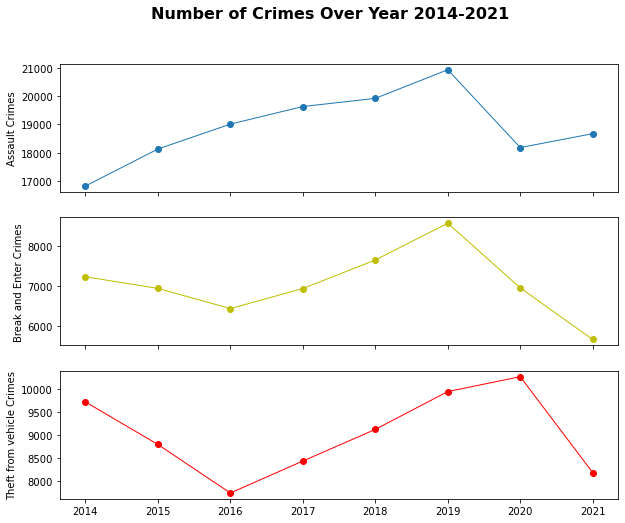

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True,figsize=(10, 8))
fig.suptitle("Number of Crimes Over Year 2014-2021", fontsize=16, fontweight="bold")
ax1.plot(Assault_Crime_by_the_year["occurrenceyear"],Assault_Crime_by_the_year["Total Crimes"], linewidth=1, marker="o")
ax1.set_ylabel("Assault Crimes")

ax2.plot(BnE_Crime_by_the_year["occurrenceyear"],BnE_Crime_by_the_year["Total Crimes"], linewidth=1, marker="o",color="y")
ax2.set_ylabel("Break and Enter Crimes")

ax3.plot(TfV_Crime_by_the_year["occurrenceyear"],TfV_Crime_by_the_year["Total Crimes"], linewidth=1, marker="o",color="r")
ax3.set_ylabel("Theft from vehicle Crimes")
plt.show()


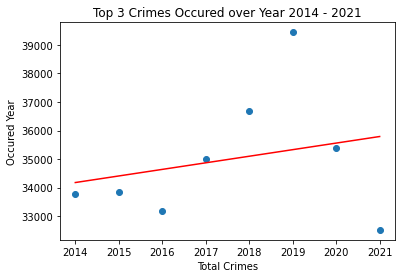

In [28]:
plt.scatter(Merged_Crime_by_the_year["occurrenceyear"],Merged_Crime_by_the_year["Total Crimes"],marker="o")
datacursor(hover=True, point_labels=Merged_Crime_by_the_year["Total Crimes"])
plt.xlabel("Total Crimes")
plt.ylabel("Occured Year")
plt.title("Top 3 Crimes Occured over Year 2014 - 2021")
slope, inte, r, p, std_err = stats.linregress(Merged_Crime_by_the_year["occurrenceyear"], Merged_Crime_by_the_year["Total Crimes"])
fit = slope * Merged_Crime_by_the_year["occurrenceyear"] + inte
plt.plot(Merged_Crime_by_the_year["occurrenceyear"] ,fit,"r-")
#plt.xticks(, rotation=90)
plt.show()

In [24]:
year = 2023
print(f"The number of crimes in 2023 forecasted as per this info will be {round(slope * year + inte,0)}.")

The number of crimes in 2023 forecasted as per this info will be 36251.0.
